## ECS 171 Homework 1

Please explain your solutions clearly and include your entire computational work when needed. Should you include any code, please make sure to provide additional comments to explain your solution. Please put your work/solution for each question after the corresponding horizontal line in a separate coding or markdown box. Feel free to add coding or markdown boxes as you see fit. Usage of the numpy, pandas, seaborn, matplotlib and sklearn libraries are allowed.

### Question 1 - (5 points)
How does the presence of outliers influence the choice between using covariance and correlation to analyze the relationship between two variables in a dataset? Explain how each measure handles outliers differently and discuss the implications for interpreting their results in practical applications.
***

 Both covariance and correlation are affected by outliers, but the impact is more pronounced with covariance due to its lack of standardization. Correlation, by normalizing these values, provides a more controlled measure, though it is still necessary to handle outliers appropriately to ensure meaningful analysis.

### Question 2 - (25 points)
The following code provides the distribution of the attributes of the breast cancer dataset from sklearn library. 


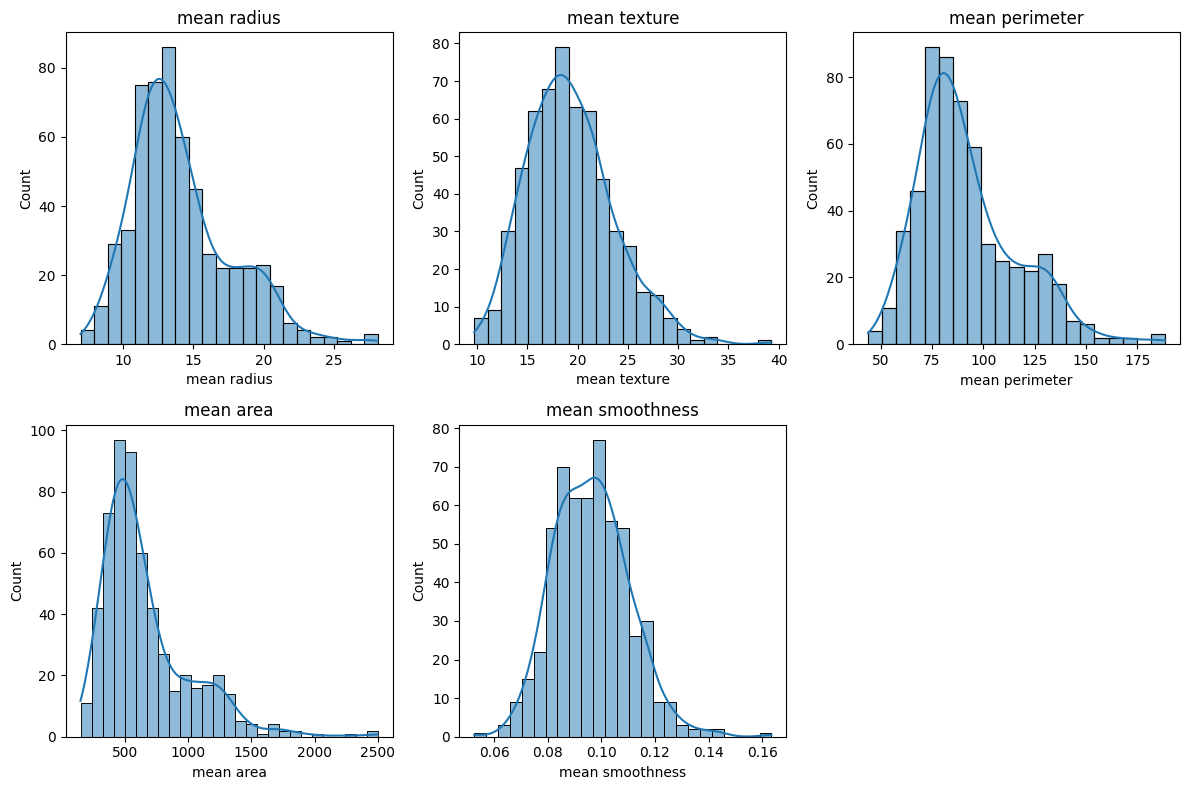


mean:
mean radius         14.127292
mean texture        19.289649
mean perimeter      91.969033
mean area          654.889104
mean smoothness      0.096360
dtype: float64 , 
median:
mean radius         13.37000
mean texture        18.84000
mean perimeter      86.24000
mean area          551.10000
mean smoothness      0.09587
dtype: float64 , 
std:
 mean radius          3.524049
mean texture         4.301036
mean perimeter      24.298981
mean area          351.914129
mean smoothness      0.014064
dtype: float64


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Plot histograms for some of the features
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(df[features_to_plot].mean() , df[features_to_plot].median(), df[features_to_plot].std()))

#### Question 2.1 - (10 points)
Analyze each plot and explain your observations regarding these attributes in terms of data skewness (for instance, is the data symmetric, if not is it right/left skewed? Why and how do you identify the skewness by using the parameters of the distributions such as mean, median, standard deviation?) Provide a complete analysis and incude any supporting explanation/computation if relevant.
***

Mean Radius plot: The histogram of this plot for the mean radius it seems to be slightly right-skewed, and as there are a tail and a higher frequency of the data points on the right side of the peak than yhe data on the left. And also that the mean of the data is slightly higher than the median, which also suggests a right skew. Additionally, the long tail towards the higher values is indicative of this skewness.

Mean Texture plot: The distribution for this plot of the mean texture it seems approximately symmetric and normally distributed. So, this is suggested by the mean and median being very close in value, and the bell-shaped curve of the histogram with no significant tail on either side.

Mean Perimeter plot: This plot is similar to the mean radius plot, because its histogram of the mean perimeter indicates there's a right-skewed distribution. And also its mean is greater than its median, and there's a visible tail extending to the right, which its confirms that the skewness.

Mean Area plot: This histogram for the mean area clearly shows that is a right-skewed distribution, and coming with a tail that extends much further to the right than the left. And the mean is significantly higher than the median, which is characteristic of a right-skewed distribution.

Mean Smoothness plot: The distribution of the mean smoothness appears to be approximately symmetric, but potentially slightly right-skewed. The mean is slightly higher than the median, but the difference is not as pronounced as in the mean area or mean perimeter.

Right-Skewed (Positive Skewness): The mean is greater than the median, and there is a long tail on the right side of the histogram.

Left-Skewed (Negative Skewness): The mean is less than the median, and there is a long tail on the left side of the histogram.

Symmetric Distribution: The mean is approximately equal to the median, and the histogram looks like a bell curve with tails decreasing equally on both sides.

#### Question 2.2 - (5 points)
Explain and compare the parameters and output of Z-score and Min-Max data transformation techniques. 
***

For the Z-score Normalization of its Parameters, it requires the mean (μ) and standard deviation (σ) of the feature. And then for the Output, it transforms the data into a distribution with a mean of 0 and a standard deviation of 1. And it resulting the Z-scores represent the number of standard deviations a data point is from the mean. So, a Z-score of 0 indicates that is a value is exactly at the mean, while a Z-score of 1 or -1 indicates that is a value is one standard deviation away from the mean.

Min-Max Normalization's parameters is Min-Max scaling and it requires the minimum and maximum values  $X_{min}$ and $X_{max}$ of the feature. And then, after applying the Min-Max normalization, all of the values will fall within the range of 0 to 1. And a value of 0 represents that the minimum value in the feature, while a value of 1 represents the maximum value.

ANd then by comparison with them, Z-score normalization is less affected by outliers than the Min-Max normalization because it involves the standard deviation. But in contrast, Min-Max normalization can be heavily skewed by outliers since they are directly influence the minimum and maximum values. Then, after the Z-score normalization, the data it is not bounded into a specific range, which it can be a problems that for some certain algorithms. And therefore, Min-Max normalization scales that the data to a fixed the range for [0,1], as well as making it more suitable for those algorithms that are sensitive to the scale of data. 

#### Question 2.3 - (5 points)
Apply the Z-score normalization technique on the dataset. You can either develop the normalization function from scratch, or use sklearn.preprocessing to make function calls to perform the transformation. After data normalization, visualize the normalized attriubutes (note: don't normalize the output variable - apply normalization on these attributes: 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'). Compare the data before and after normalization. What changes you see in the data? 
***

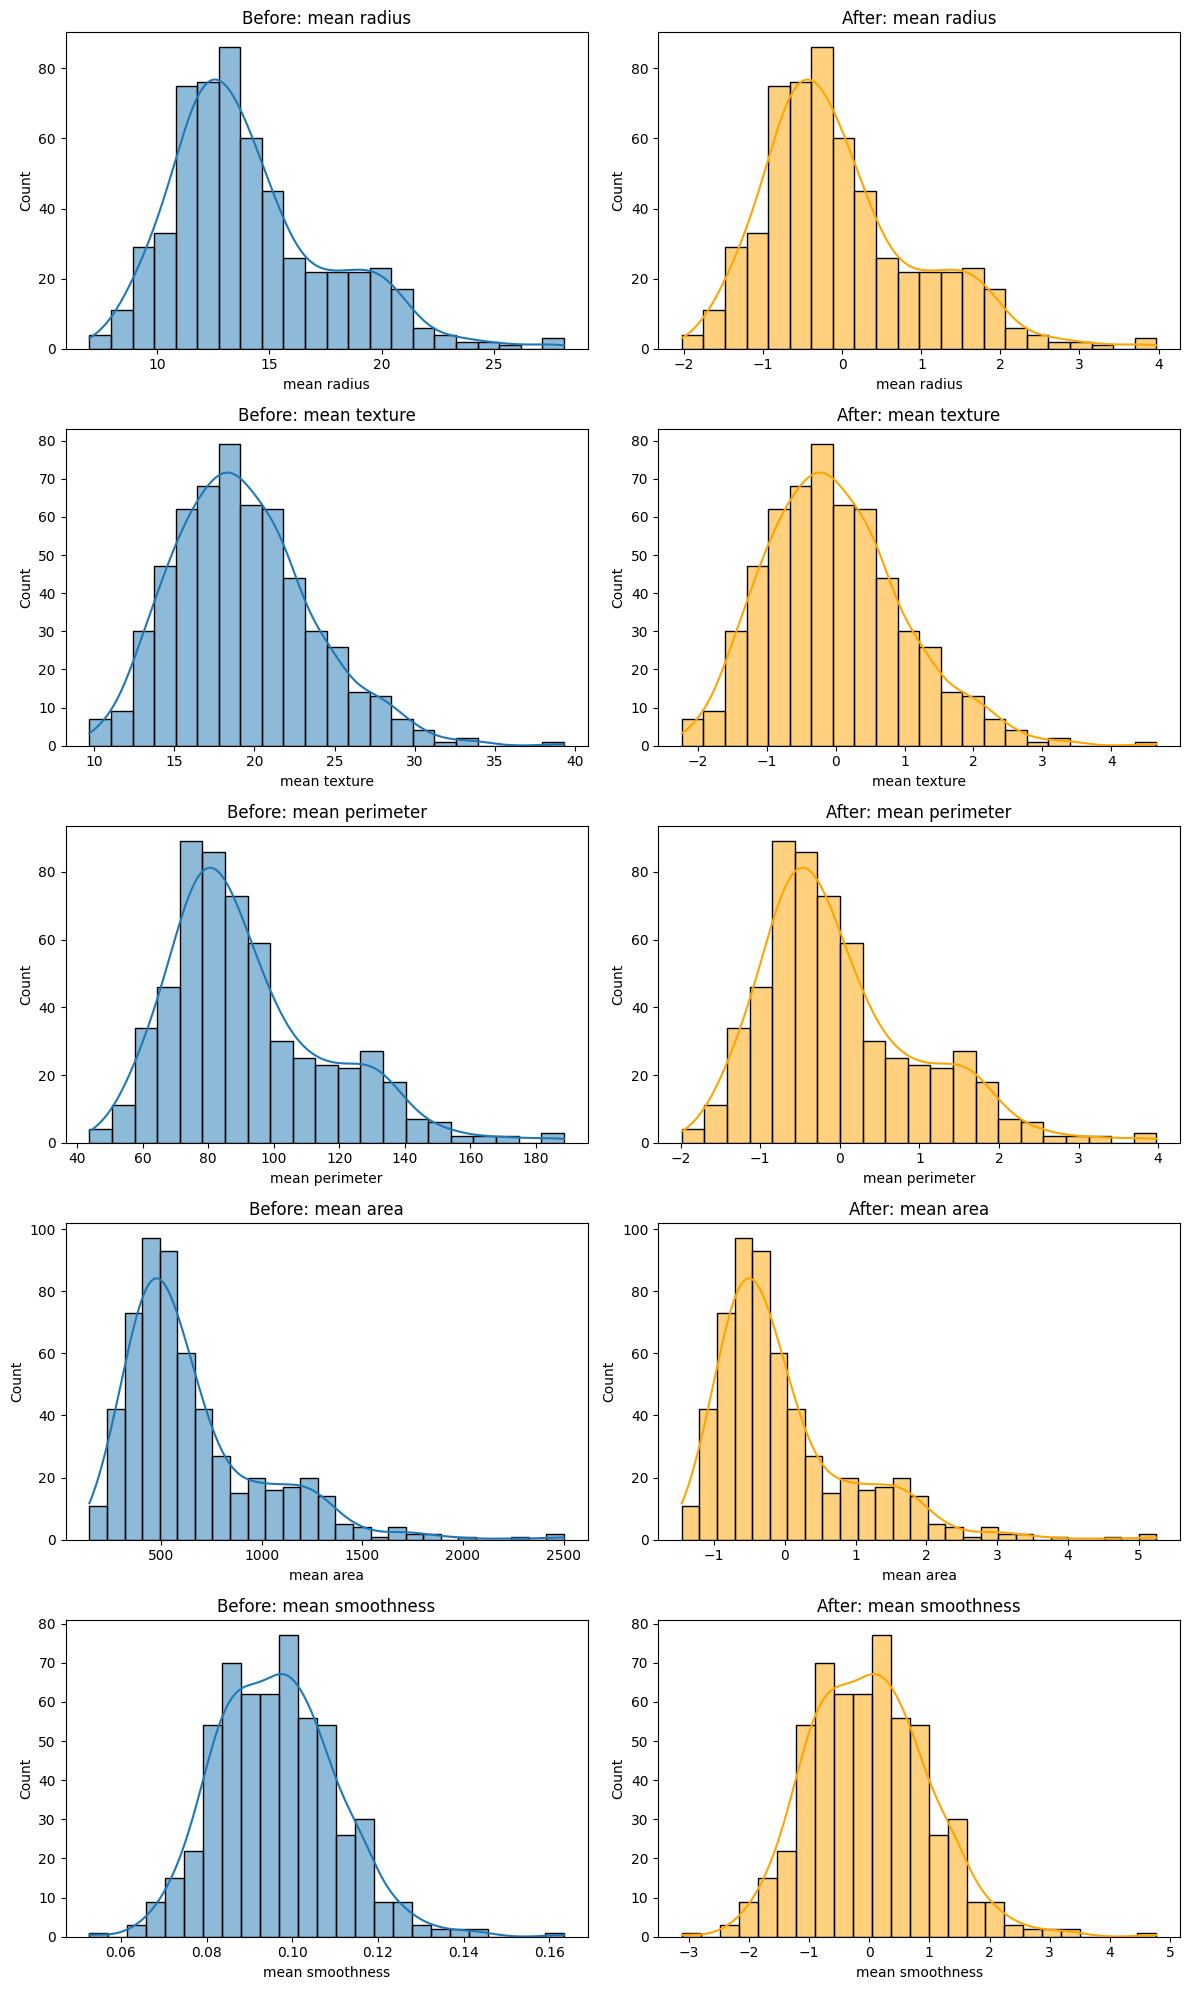

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Features to normalize
features_to_normalize = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
df_normalized = df.copy()
df_normalized[features_to_normalize] = scaler.fit_transform(df_normalized[features_to_normalize])

# Plot histograms before and after normalization for comparison
fig, axes = plt.subplots(5, 2, figsize=(12, 20))
axes = axes.ravel()

# Plot before normalization
for i, feature in enumerate(features_to_normalize):
    sns.histplot(df[feature], kde=True, ax=axes[2*i])
    axes[2*i].set_title(f'Before: {feature}')

# Plot after normalization
for i, feature in enumerate(features_to_normalize):
    sns.histplot(df_normalized[feature], kde=True, ax=axes[2*i+1], color='orange')
    axes[2*i+1].set_title(f'After: {feature}')

plt.tight_layout()
plt.show()

Analysis for this code:

* Import Necessary Libraries and they are refering from 2.2
* The load_breast_cancer() function from sklearn.datasets is used to load the breast cancer dataset. This dataset is commonly used for practicing machine learning and contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
* The data loaded from the load_breast_cancer() function is converted into a pandas DataFrame. This is done for easier manipulation and analysis of the data.
* A list of feature names is defined under features_to_normalize. These are the features that will be standardized.
* An instance of StandardScaler is created. This scaler will be used to standardize the features, which involves scaling the feature data so it has a mean of 0 and a standard deviation of 1.
* The fit_transform method of the StandardScaler is applied to the selected features of the DataFrame. This computes the mean and standard deviation used for later scaling and scales the features.
* Histograms of the selected features are plotted both before and after normalization using seaborn.histplot.
* The plt.subplots function is used to create a figure with multiple subplots arranged in a 5x2 grid (since there are 5 features and 2 conditions – before and after normalization).
* The histograms allow for visual comparison of feature distributions before and after the scaling process.
* plt.tight_layout() is used to adjust the layout of the plots to make sure they fit well within the figure area and do not overlap.
* plt.show() displays the plot.

Observation of this code:

* After Z-score normalization, the center of each distribution is around 0, which is expected since Z-score normalization centers the distribution around the mean of the data.
* The spread of the distributions has been standardized, as indicated by the X-axis, which now shows the number of standard deviations from the mean. This is characteristic of Z-score normalization, which scales the data according to its standard deviation.
* The shape of the distributions remains the same before and after normalization; if a distribution was right-skewed before normalization, it remains right-skewed after. However, now we can more easily compare the spread and outliers across different features since they are all on the same scale.
* The presence of outliers can now be observed as data points that lie several standard deviations away from the mean. For example, in the 'mean area' plot, there are points beyond 4 standard deviations after normalization, indicating potential outliers.

Z-score normalization has not changed the intrinsic shape of the data distributions but it has standardized their scales to make the features more comparable. And the data is now ready for use in algorithms that assume normally distributed data or require data on a comparable scale. 

#### Question 2.4 - (5 points)
Find the outliers in the data (for the identified attributes) if any, by computing the interquartile ranges for Q1, Q2, Q3, IQR, min and max. Also visualize the outliers if any. 
***

(                        Q1        Q3        IQR  Lower Bound  Upper Bound
 mean radius       11.70000   15.7800    4.08000     5.580000    21.900000
 mean texture      16.17000   21.8000    5.63000     7.725000    30.245000
 mean perimeter    75.17000  104.1000   28.93000    31.775000   147.495000
 mean area        420.30000  782.7000  362.40000  -123.300000  1326.300000
 mean smoothness    0.08637    0.1053    0.01893     0.057975     0.133695,
     mean radius  mean texture  mean perimeter  mean area  mean smoothness
 0        11.420         20.38           77.58      386.1          0.14250
 1        21.160         23.04          137.20     1404.0          0.09428
 2        25.220         24.91          171.50     1878.0          0.10630
 3        13.110         15.56           87.21      530.2          0.13980
 4        22.270         19.67          152.80     1509.0          0.13260
 5        24.250         20.20          166.20     1761.0          0.14470
 6        23.270        

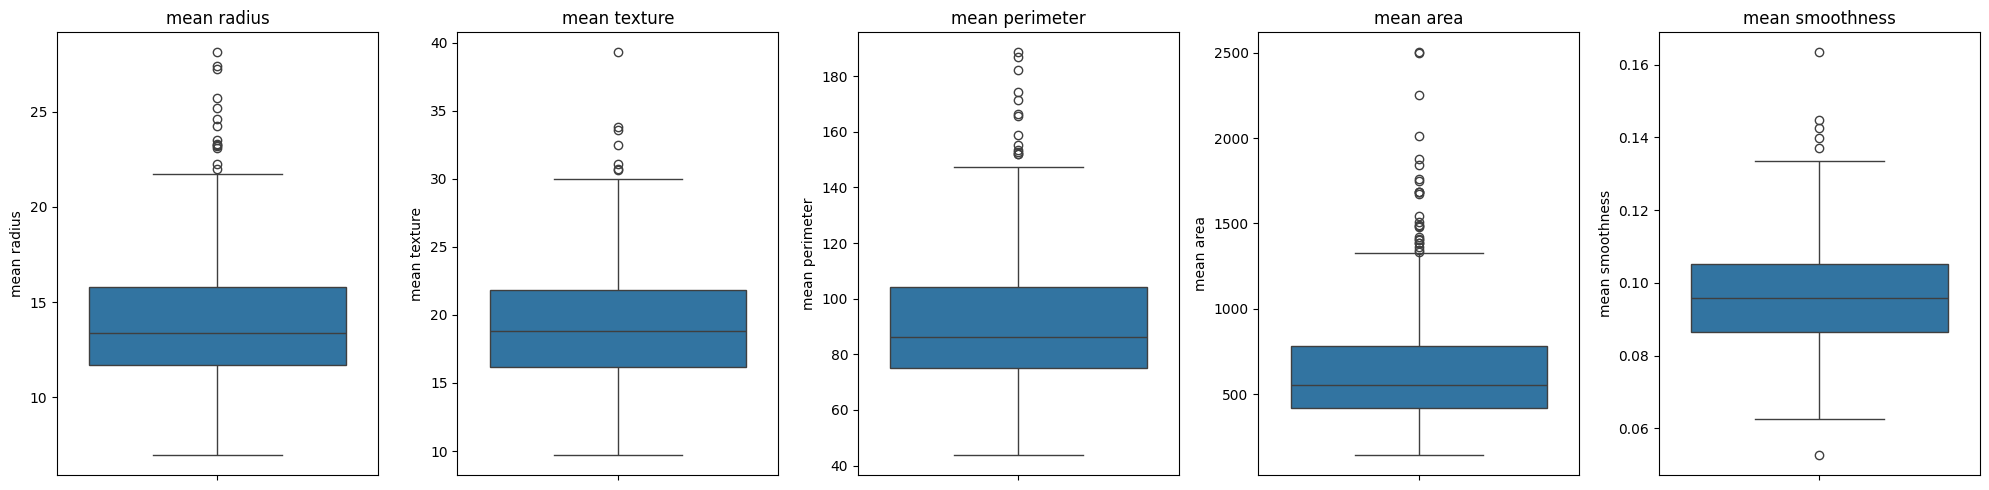

In [3]:
# Calculate the IQR for each feature
Q1 = df[features_to_normalize].quantile(0.25)
Q3 = df[features_to_normalize].quantile(0.75)
IQR = Q3 - Q1

# Define the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
is_outlier = ((df[features_to_normalize] < lower_bound) | (df[features_to_normalize] > upper_bound)).any(axis=1)
outliers = df[features_to_normalize][is_outlier]

# Visualize the outliers using boxplots
fig, axes = plt.subplots(1, len(features_to_normalize), figsize=(20, 5))
for i, feature in enumerate(features_to_normalize):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()

# Create a DataFrame to hold the IQR data for output
outlier_stats = pd.DataFrame({
    'Q1': Q1,
    'Q3': Q3,
    'IQR': IQR,
    'Lower Bound': lower_bound,
    'Upper Bound': upper_bound
})

# Display the statistics and the outliers
outlier_stats, outliers.reset_index(drop=True)


Code analysis:


* The code calculates the first (Q1) and third (Q3) quartiles of the specified features, which represent the 25th and 75th percentiles, respectively.
* The IQR, which is the difference between Q3 and Q1, measures the spread of the middle 50% of the data.
* The code calculates the lower and upper bounds for outliers. Values below the lower bound or above the upper bound are considered outliers.
* The bounds are defined as 1.5 times the IQR below Q1 and 1.5 times the IQR above Q3, following the typical "1.5 x IQR" rule for outlier detection.
* The code creates a boolean mask (is_outlier) that is True for any data point outside the defined bounds.
* It then applies this mask to the DataFrame to extract the outliers.
* The code plots boxplots for the selected features, which will visually indicate the outliers as points outside the whiskers of the boxplots.
* plt.tight_layout() is used to adjust the layout of the plots to prevent overlapping.
* A new DataFrame (outlier_stats) is created to hold the quartiles, IQR, and bounds for each feature, which can be used for reporting.
* The code outputs the outlier_stats DataFrame and a version of the outliers DataFrame reset without the index. This reset on the index is typically done to clean up the DataFrame before displaying or further processing.

### Question 3 - (30 points)
For this question, use the [California House Prices dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from sklearn. The goal is to develop a linear regression model to predict the target variable (MedHouseVal) which represents the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000). Note that the precision of changes to look for in this dataset may be relatively small so keep an eye out for smaller changes in the difference between models - in the range of around 2 percent or more between models.

#### Question 3.1 - (10 points)
Split your data into train and test sets by [80:20] rate (80\% for training and 20\% for testing). Initialize a LinearRegression model using the LinearRegression algorithm in sklearn. Evaluate the performance of the model on the test data by reporting MSE and R2 values (you can call the existing functions in sklearn to report MSE and R2, or you can develop these techniques from scratch). Visualize the relatioship between y and y_hat in test data (see the example plot covered during lec3-slide# 7).
***

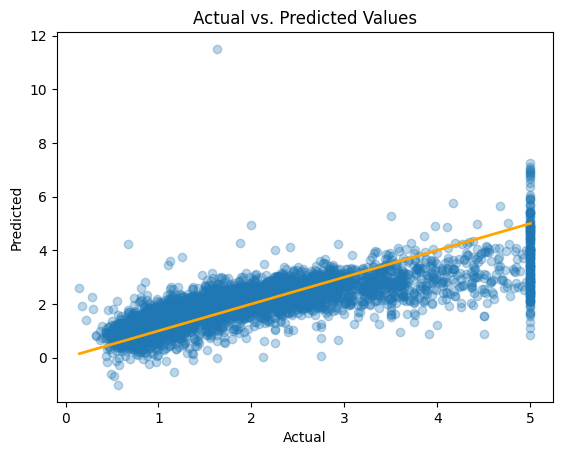

mse: 0.5558915986952426
r2: 0.5757877060324521


In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Fetch the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize the relationship between actual and predicted values
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'orange', lw=2) # Plotting the line of perfect prediction
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')

# Show the plot and performance metrics
plt.show(), mse, r2

print(f'mse: {mse}')
print(f'r2: {r2}')


Code Analysis:

* The script begins by importing necessary modules from sklearn for loading the dataset, splitting it into training and test sets, creating a linear regression model, and evaluating the model's 
performance. It also imports numpy for numerical computations and matplotlib.pyplot for plotting.
* It fetches the California housing dataset, which includes data points about housing features and their corresponding prices.
* The dataset is split into features (X) and the target variable (y). The data is then split into a training set (80%) and a test set (20%) using the train_test_split function, with a random_state set for reproducibility of the results.
* A linear regression model is instantiated and trained on the training data using the fit method.
* The trained model is used to predict the housing prices (target variable) on the test set.
* The script computes the mean squared error (MSE) and R-squared (R2) score to evaluate the performance of the model. The MSE measures the average squared difference between the observed actual outcomes and the predictions by the model, while the R2 score represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model.
* A scatter plot is created to visualize the relationship between the actual and predicted values. An identity line (line of perfect prediction) is also plotted to indicate where the perfect predictions would lie.

#### Question 3.2 - (10 points)
Repeat 3.1 using the normalized features to train your model (use z-score). Compare your findings from 3.1 and 3.2 and report any observations. 
***

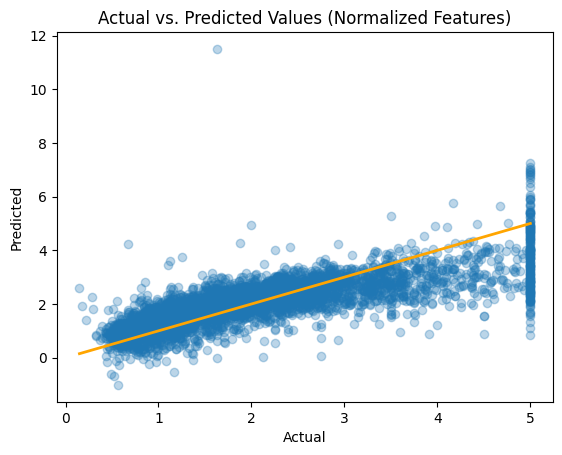

mse_normalized: 0.5558915986952442
r2_normalized: 0.575787706032451


In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Fetch the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler and transform the features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Initialize and train the LinearRegression model using normalized features
model_normalized = LinearRegression()
model_normalized.fit(X_train_normalized, y_train)

# Predict on the normalized test data
y_pred_normalized = model_normalized.predict(X_test_normalized)

# Evaluate the normalized model performance
r2_normalized = r2_score(y_test, y_pred_normalized)
mse_normalized = mean_squared_error(y_test, y_pred_normalized)


# Visualize the relationship between actual and predicted values for the normalized model
plt.scatter(y_test, y_pred_normalized, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'orange', lw=2) # Plotting the line of perfect prediction
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Normalized Features)')

# Show the plot and performance metrics for the normalized model
plt.show(), mse_normalized, r2_normalized

print(f'mse_normalized: {mse_normalized}')
print(f'r2_normalized: {r2_normalized}')

code analysis:

* The script begins by importing necessary modules from sklearn for loading the dataset, splitting it into training and test sets, creating a linear regression model, and evaluating the model's 
performance. It also imports numpy for numerical computations and matplotlib.pyplot for plotting.
* It fetches the California housing dataset, which includes data points about housing features and their corresponding prices.
* The dataset is split into features (X) and the target variable (y). The data is then split into a training set (80%) and a test set (20%) using the train_test_split function, with a random_state set for reproducibility of the results.
* The script initializes a StandardScaler for feature scaling. It then normalizes the training features and applies the same transformation to the test features to ensure consistency in scaling.
* A linear regression model is instantiated and trained on the training data using the fit method.
* The trained model is used to predict the housing prices (target variable) on the test set.
* The script computes the mean squared error (MSE) and R-squared (R2) score to evaluate the performance of the model. The MSE measures the average squared difference between the observed actual outcomes and the predictions by the model, while the R2 score represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model.
* A scatter plot is created to visualize the relationship between the actual and predicted values. An identity line (line of perfect prediction) is also plotted to indicate where the perfect predictions would lie.

Observations from the Plots 3.1 and 3.2:

Both plots display the predictions versus the actual values in a similar scatter pattern. The orange line represents where the predicted values equal the actual values, serving as a visual aid to assess model accuracy.

The MSE (Mean Squared Error) and R² (coefficient of determination) values are provided in the output beneath each plot.
The performance metrics (MSE and R²) are almost identical in both cases, as evidenced by the nearly identical values reported. This suggests that normalization did not significantly change the predictive performance of the model for this particular dataset.

#### Question 3.3 - (10 points)
Implement cross validation method (from scratch), and apply 12-fold cross validation on your model to enhance the fit of your model. Report the mean of the R2 and MSE scores as the mse and R2 of the best model. Print the coefficients (i.e., weights) of the best model and explain what do you consider to be the best model. 
***

In [8]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Fetch the dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Initialize cross-validation
kf = KFold(n_splits=12, shuffle=True, random_state=42)

# Lists to store performance metrics for each fold
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    # Split data into training and test sets for this CV fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Normalize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))

# Calculate the mean MSE and R2 scores
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)

# Identify and output the best model's performance and coefficients
best_model_coeffs = model.coef_
mean_mse, mean_r2, best_model_coeffs

print(f'Mean MSE across all folds: {mean_mse}')
print(f'Mean R2 across all folds: {mean_r2}')
print(f'Coefficients of the best model: {best_model_coeffs}')

Mean MSE across all folds: 0.5284882334798292
Mean R2 across all folds: 0.6028374958036014
Coefficients of the best model: [ 0.82373516  0.11790157 -0.25691584  0.30073042 -0.00692892 -0.03938742
 -0.90291476 -0.87179393]


Determine the Best Model: The best model could be defined as the one that, on average, yields the lowest MSE and the highest R2 score across the cross-validation folds.

Code analysis

* The code starts by importing necessary libraries and functions for loading the data, preprocessing, modeling, cross-validation, and computing metrics.
* It loads the California housing dataset, which contains data on houses, such as their features and corresponding target values (house prices).
* It initializes a k-fold cross-validation process with 12 folds (KFold), shuffling the data, and setting a random_state for reproducibility.
* The data is split into a training set and a validation set based on the indices provided by the KFold object.
* The training data features are standardized (scaled) using StandardScaler to have zero mean and unit variance. The same scaling parameters are applied to the test data to maintain consistency.
* A LinearRegression model is trained on the normalized training data.
* The trained model is then used to predict the target values for the test data.
* For each fold, the mean squared error (MSE) and R-squared (R²) are calculated to evaluate the model's performance. These values are appended to lists (mse_scores, r2_scores) for later analysis.
* After all folds have been processed, the code computes the average MSE and R² across all folds to give an overall performance metric for the model.


### Question 4 - (20 points)
Answer the following questions:

#### Question 4.1 - (3 points)
What is the difference between Gradient Descent and Ordinary Lease Squares method? Explain the advantages and disadvantages of each approach.
***

Ordinary Lease Squares method is the best used for smaller, and it's less complex datasets where the cost of computing the matrix inverse is not prohibitive. For Gradient Descent, on the other hand, is more suitable for large or complex datasets where a closed-form solution either does not exist or is not practical to compute. The choice between the two methods will depend on the size and characteristics of the dataset, the computational resources available, and the specific requirements of the application.


#### Question 4.2 - (2 points)
How does a negative or positive gradient indicate the direction towards achieving a sub-optimal or optimal weight? Explain your answer.
***

Negative Gradient: A negative gradient for a weight indicates that the loss function decreases as the weight increases. To minimize the loss, gradient descent will adjust the weight in the positive direction (since we move against the gradient).

Positive Gradient: Conversely, a positive gradient for a weight indicates that the loss function increases as the weight increases. Gradient descent will adjust the weight in the negative direction to minimize the loss.

#### Question 4.3 - (10 points)
Provide the complete math for updating Wj associated with the jth attribute of a dataset using Gradient Descent weight update rule for finding the coefficients of a linear regression model. Use the Sum of Squared Residuals (SSR) as the loss (or cost) function to compute the gradient (i.e., weight change). Provide all the necessary details explaining the parameters used in your work.
***

In a linear regression model, the weight $w_j$ ​ associated with the $jth$ attribute of the dataset can be updated using Gradient Descent by minimizing the Sum of Squared Residuals (SSR) as the loss function.

\begin{align*}
\text{Given the SSR:} \quad & SSR = \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^2 \\
\text{Where :} \quad & \hat{y}^{(i)} = w_0 + w_1x_1^{(i)} + w_2x_2^{(i)} + \ldots + w_jx_j^{(i)} + \ldots + w_mx_m^{(i)} \\
\text{The gradient of SSR with respect to } w_j \text{ is:} \quad & \frac{\partial}{\partial w_j} SSR = -2 \sum_{i=1}^{n} x_j^{(i)}(y^{(i)} - \hat{y}^{(i)}) \\
\text{The weight update rule for } w_j \text{ using learning rate } \alpha \text{ is:} \quad & w_j := w_j + 2\alpha \sum_{i=1}^{n} x_j^{(i)}(y^{(i)} - \hat{y}^{(i)})
\end{align*}


#### Question 4.4 - (5 points)
Explain the strategy in and the difference between stochastic gradient descent and batch-gradient descent algorithmically. 
***

Batch Gradient Descent:

* It computes the gradient of the loss function using the entire training dataset. On each iteration, the algorithm calculates the error for each example in the training dataset, but only updates the model after all training examples have been evaluated.

Stochastic Gradient Descent:

* It computes the gradient using only one training example at a time. On each iteration, the algorithm randomly selects an example from the training dataset, computes the gradient of the loss function just for that single example, and updates the model immediately.

Since that both methods are aim to reach the lowest point of the loss function, which it would represents the optimal parameters for the model. Batch Gradient Descent moves smoothly towards the minimum but it might be impractical for the large datasets. And tn contrast, Stochastic Gradient Descent moves in a more erratic fashion but can handle large datasets and may reach the minimum quicker.

### Question 5 - (20 points)
Use California House Prices dataset for this question. 

#### Question 5.1 - (15 points)
Use stochastic gradient descent approach to train a linear regression model using all the features of the dataset. After each epoch of training, record the MSE and R2 scores of the linear regression model on training data and test data. Run your solution for 100 epochs. Plot the recorded MSE-train[], MSE-test in one figure, and R2-train[], R2-test in another figure (over 100 epochs). 
***

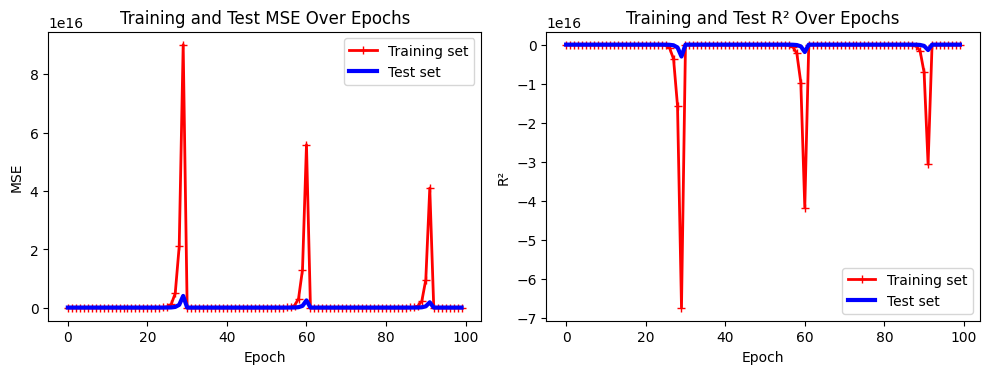

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SGDRegressor with a higher max_iter and a learning rate schedule
sgd_reg = SGDRegressor(max_iter=1000, warm_start=True, penalty=None,
                       learning_rate='invscaling', eta0=0.01, power_t=0.25, random_state=42, tol=1e-3)

# Lists to store the metrics after each epoch
train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

# Train the model for 100 epochs
for epoch in range(100):
    sgd_reg.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_train_predict = sgd_reg.predict(X_train_scaled)
    y_test_predict = sgd_reg.predict(X_test_scaled)
    
    # Calculate and record the metrics
    train_mse.append(mean_squared_error(y_train, y_train_predict))
    test_mse.append(mean_squared_error(y_test, y_test_predict))
    train_r2.append(r2_score(y_train, y_train_predict))
    test_r2.append(r2_score(y_test, y_test_predict))

# Plot MSE for training and test sets
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(train_mse, "r-+", linewidth=2, label="Training set")
plt.plot(test_mse, "b-", linewidth=3, label="Test set")
plt.legend(loc="upper right")
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test MSE Over Epochs')

# Plot R2 for training and test sets
plt.subplot(122)
plt.plot(train_r2, "r-+", linewidth=2, label="Training set")
plt.plot(test_r2, "b-", linewidth=3, label="Test set")
plt.legend(loc="lower right")
plt.xlabel('Epoch')
plt.ylabel('R²')
plt.title('Training and Test R² Over Epochs')

plt.tight_layout()
plt.show()


#### Question 5.2 - (5 points)
Annotate your code. Explain the details of your understanding of the code below the code or in the following markdown cell.
***

The code begins by loading the California Housing dataset that which refering to question 2.2, and also the dataset is split it into the training set for 80% and a test set 20% within a fixed of random seed for reproducibility. And the 'StandardScaler' library is used to standardize the feature becasue it's important for SGD which is sensitive to the scale of features. And then an using the 'SGDRegressor' library and it is initialized with some specific parameters, including max_iter=1000, warm_start=True, penalty=None, learning_rate=invscaling, eta0=0.01, power_t=0.25, and a tol value. And especially that warm_start=True allows the model able to continue with training from where it left off, which is useful that when we train the model in the epochs manually. And then the penalty=None parameter indicates that there's no regularization is applied. Moreover, the invscaling learning rate schedule is decreases the learning rate over the time, which it can help for the algorithm able to converge it til the minimum. And for the training Loop part, the model is trained for like about 100 epoch in a for loop. And then for each epoch, the model is trained further, and also that performance the metrics (MSE and R²) for both of the training and test sets can be recorded. And for the performance metrics, We know that from lab1 MSE is used to assess the average squared difference between the predicted and the actual values, a measure of model accuracy. And the R² is like a statistical measure that use to represents the proportion of the variance for the dependent variable that's explained by the independent variables. And lastly, for the final model, as it trained in the last epoch, it should ideally be evaluated over the entire dataset or through the cross-validation, rather than just the last split the provided by the for loop. So therefore, the final performance should be the average over all of the epochs or folds to mitigate that the variability observed.

